# HACKATON

## Data Exploration

### Chargement des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the data
wtg_times = pd.read_csv('waiting_times_train.csv')
weather_data = pd.read_csv('weather_data.csv')
wtg_times['DATETIME'] = pd.to_datetime(wtg_times['DATETIME'])
weather_data['DATETIME'] = pd.to_datetime(weather_data['DATETIME'])
weather_data.drop(columns=['rain_1h', 'snow_1h'], inplace=True)
wtg_times.head(5)

,DATETIME,ENTITY_DESCRIPTION_SHORT,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H
0,2022-02-05 11:45:00,Water Ride,247.00,0,20,NaN,NaN,NaN,30.0
1,2019-02-24 10:45:00,Water Ride,247.00,0,30,375.0,NaN,495.0,25.0
2,2021-07-17 15:45:00,Pirate Ship,280.50,0,35,NaN,NaN,NaN,35.0
3,2022-04-03 19:45:00,Pirate Ship,230.35,0,15,-135.0,NaN,195.0,10.0
4,2021-10-20 10:30:00,Pirate Ship,153.00,0,15,NaN,NaN,NaN,10.0


In [2]:
weather_data.head(5)

,temp,dew_point,feels_like,pressure,humidity,wind_speed,clouds_all,DATETIME
0,12.170,7.6800,11.3700,1019.0,74.0,3.3000,100.00,2018-10-01 00:00:00
1,11.995,7.6075,11.1925,1019.0,74.5,3.2625,99.25,2018-10-01 00:15:00
2,11.820,7.5350,11.0150,1019.0,75.0,3.2250,98.50,2018-10-01 00:30:00
3,11.645,7.4625,10.8375,1019.0,75.5,3.1875,97.75,2018-10-01 00:45:00
4,11.470,7.3900,10.6600,1019.0,76.0,3.1500,97.00,2018-10-01 01:00:00


In [3]:
dates = wtg_times['DATETIME']
dates.dt.dayofweek # 0 est lundi, 6 est dimanche
dates.dt.hour # 0 est minuit, 23 est 23h
dates.dt.month # 1 est janvier, 12 est décembre
dates.dt.year # année
dates.dt.day # jour du mois
dates.dt.minute # minute
dates.dt.minute + dates.dt.hour * 60 # minutes depuis minuit
pass

In [4]:
validation = pd.read_csv('waiting_times_X_test_val.csv')
validation['DATETIME'] = pd.to_datetime(validation['DATETIME'])
validation.head(5)

,DATETIME,ENTITY_DESCRIPTION_SHORT,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW
0,2019-11-23 10:45:00,Water Ride,247.0,0,20,375.0,75.0,675.0
1,2022-01-03 16:45:00,Pirate Ship,153.0,0,45,NaN,NaN,NaN
2,2021-12-04 15:30:00,Pirate Ship,255.0,0,40,NaN,NaN,NaN
3,2020-02-05 13:15:00,Water Ride,247.0,0,15,225.0,NaN,345.0
4,2022-05-13 15:15:00,Flying Coaster,756.0,0,35,135.0,NaN,465.0


### Temps d'attente moyen par jour de la semaine pour chaque attraction

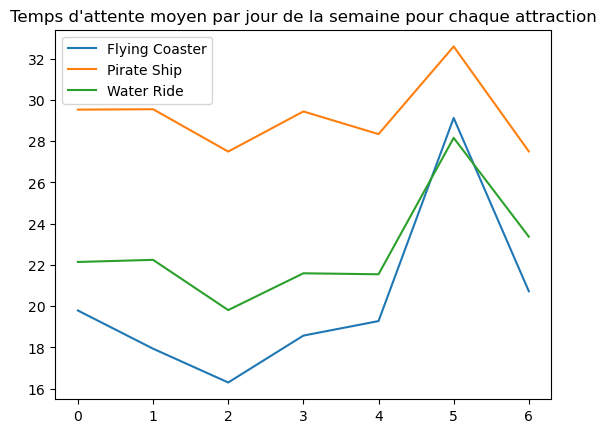

In [5]:
# group by day of week
grouped_entity = wtg_times.groupby('ENTITY_DESCRIPTION_SHORT')

for name, group in grouped_entity:
    grouped = group.groupby(dates.dt.dayofweek)
    waiting_times = grouped['CURRENT_WAIT_TIME'].mean()
    plt.plot(waiting_times, label=name)
plt.legend()
plt.title('Temps d\'attente moyen par jour de la semaine pour chaque attraction')
plt.show()

### Temps d'attente moyen au cours de la journée pour chaque journée pour chaque attraction

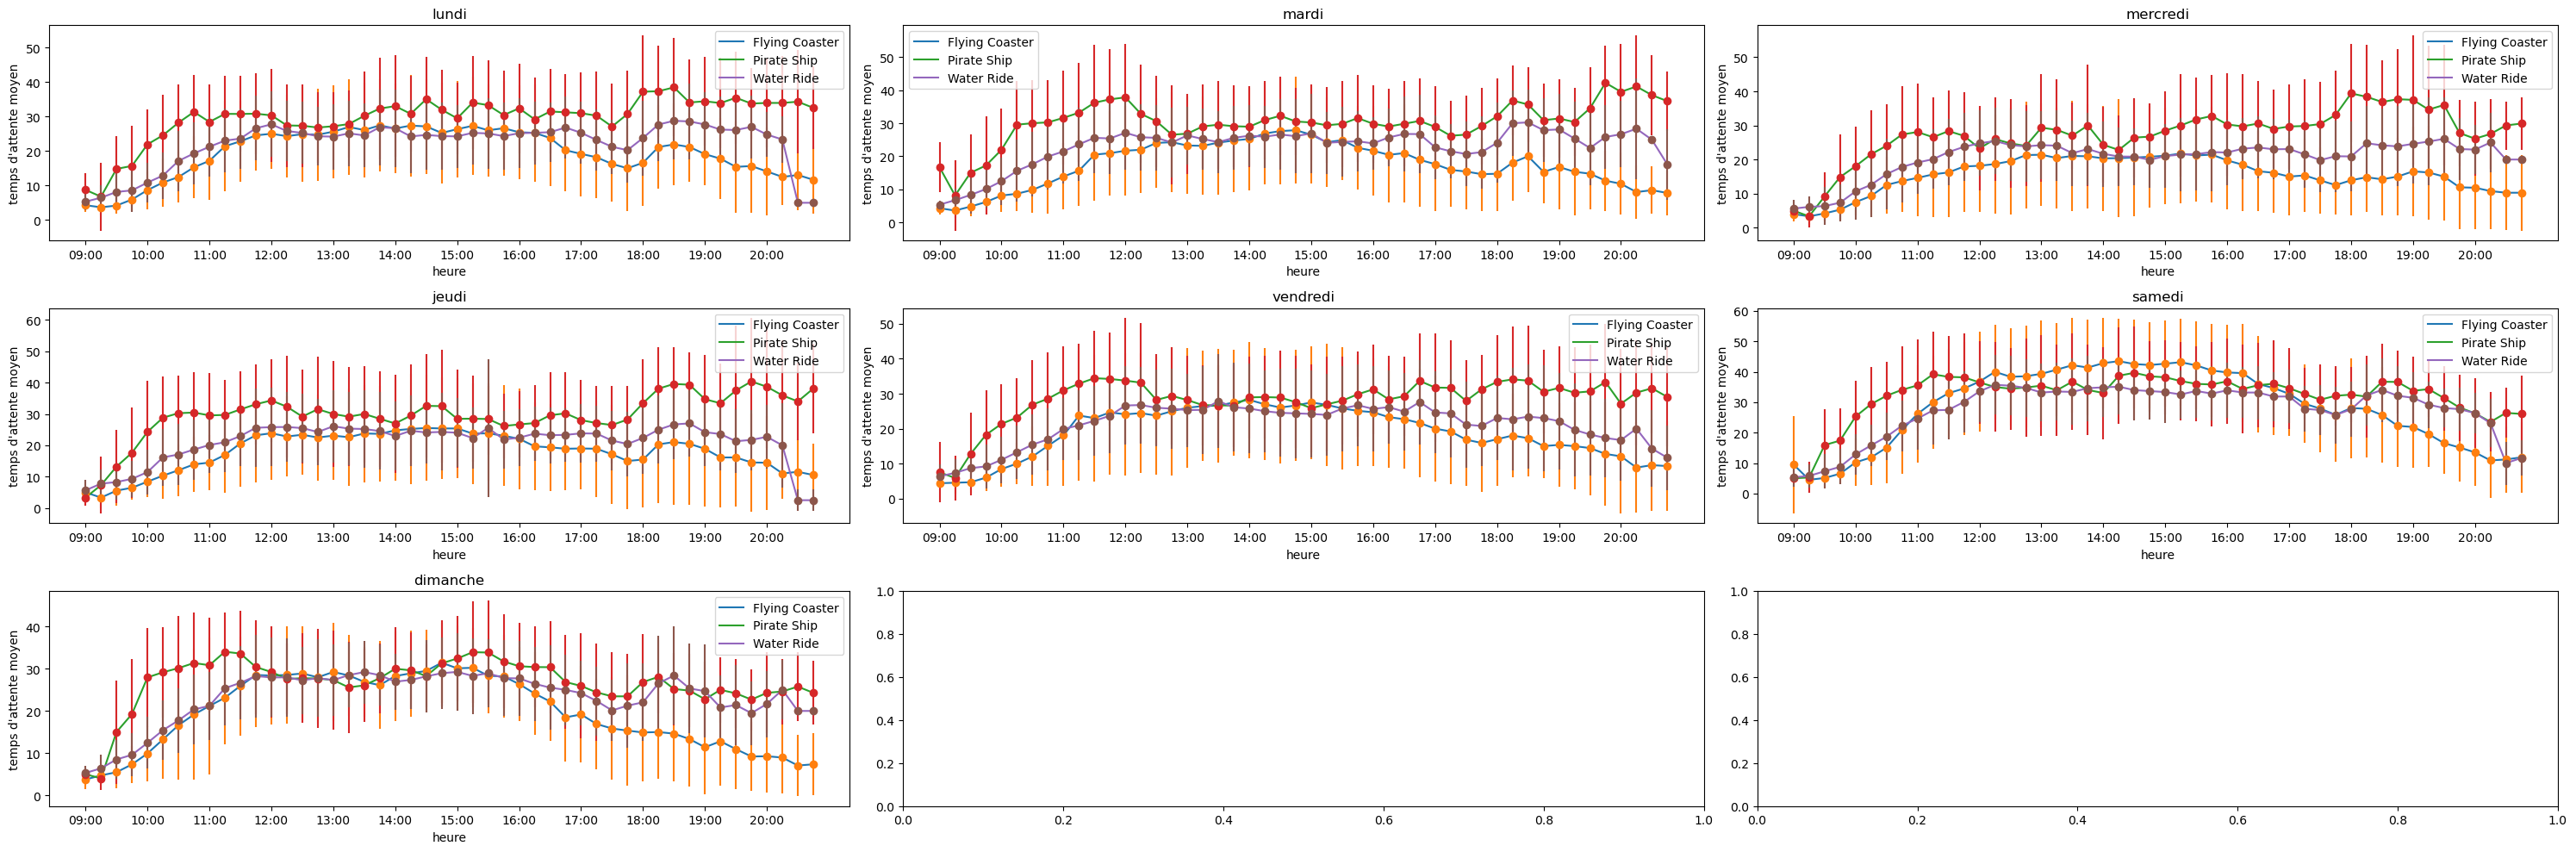

In [6]:
grouped_entity = wtg_times.groupby(['ENTITY_DESCRIPTION_SHORT', dates.dt.dayofweek])

days = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

fig, axs = plt.subplots(3, 3, figsize=(30, 10))

for name, group in grouped_entity:
    grouped = group.groupby(dates.dt.hour * 60 + dates.dt.minute)
    waiting_times = grouped['CURRENT_WAIT_TIME'].mean()

    # axs[name[1]//3, name[1]%3].plot(waiting_times.values, label=name[0])
    # axs[name[1]//3, name[1]%3].set_title(days[name[1]])
    # axs[name[1]//3, name[1]%3].set_xlabel('heure')
    # axs[name[1]//3, name[1]%3].set_ylabel('temps d\'attente moyen')
    # axs[name[1]//3, name[1]%3].legend()

    times = np.arange(waiting_times.index.min(), waiting_times.index.max(), 60)

    axs[name[1]//3, name[1]%3].plot(waiting_times, label=name[0])
    axs[name[1]//3, name[1]%3].set_xticks(times)
    axs[name[1]//3, name[1]%3].set_xticklabels([f'{i//60:02d}:{i%60:02d}' for i in times])

    axs[name[1]//3, name[1]%3].set_title(days[name[1]])
    axs[name[1]//3, name[1]%3].set_xlabel('heure')
    axs[name[1]//3, name[1]%3].set_ylabel('temps d\'attente moyen')
    axs[name[1]//3, name[1]%3].legend()

    waiting_times_std = grouped['CURRENT_WAIT_TIME'].std()
    axs[name[1]//3, name[1]%3].errorbar(waiting_times.index, waiting_times, yerr=waiting_times_std, fmt='o')


plt.tight_layout()
plt.show()

In [7]:
wtg_times

,DATETIME,ENTITY_DESCRIPTION_SHORT,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H
0,2022-02-05 11:45:00,Water Ride,247.00,0,20,NaN,NaN,NaN,30.0
1,2019-02-24 10:45:00,Water Ride,247.00,0,30,375.0,NaN,495.0,25.0
2,2021-07-17 15:45:00,Pirate Ship,280.50,0,35,NaN,NaN,NaN,35.0
3,2022-04-03 19:45:00,Pirate Ship,230.35,0,15,-135.0,NaN,195.0,10.0
4,2021-10-20 10:30:00,Pirate Ship,153.00,0,15,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...
37013,2022-05-12 15:30:00,Flying Coaster,756.00,0,30,120.0,NaN,450.0,10.0
37014,2018-10-17 13:15:00,Pirate Ship,280.50,0,15,255.0,-65.0,405.0,20.0
37015,2018-12-27 19:45:00,Flying Coaster,756.00,0,15,-165.0,-475.0,135.0,10.0
37016,2020-02-16 13:00:00,Flying Coaster,756.00,0,30,240.0,NaN,420.0,45.0


In [8]:
# PEU CONCLUANT - Idée : pour chaque date de validation, trouver la date la plus proche dans wtg_times et prendre le temps d'attente associé

# create the distance map btwn validation['DATETIME'] and wtg_times['DATETIME']
distance = np.abs(wtg_times['DATETIME'].values[:, None] - validation['DATETIME'].values[None, :])
distance2 = np.abs(wtg_times['DATETIME'].values[:, None] - validation['DATETIME'].values[None, :] - pd.Timedelta('2h'))

# maintenant, on va associer à la colonne "y_pred" de validation le temps d'attente correspondant dans wtg_times, "CURRENT_WAIT_TIME" ou "WAIT_TIME_IN_2H", selon la distance

# on commence par trouver les indices des temps d'attente correspondants
indices = np.argmin(distance, axis=0)
indices2 = np.argmin(distance2, axis=0)

# la distance associée à chaque temps d'attente
distance = distance[indices, range(len(indices))]
distance2 = distance2[indices2, range(len(indices2))]

mask = distance < distance2

# on remplit la colonne "y_pred" de validation
# validation['y_pred'] = wtg_times['CURRENT_WAIT_TIME'].values[indices]
# validation['y_pred'][mask] = wtg_times['WAIT_TIME_IN_2H'].values[indices2[mask]]

#make_submission(validation['y_pred'], 'submissions/waiting_time.csv')

### RMSE : __**15.72**__

In [9]:
# Maintenant, on groupe par attraction pour voir si on peut faire mieux

grouped_entity = wtg_times.groupby('ENTITY_DESCRIPTION_SHORT')

for name, group in grouped_entity:
    v = validation[validation['ENTITY_DESCRIPTION_SHORT'] == name]
    distance = np.abs(group['DATETIME'].values[:, None] - v['DATETIME'].values[None, :])
    distance2 = np.abs(group['DATETIME'].values[:, None] - v['DATETIME'].values[None, :] - pd.Timedelta('2h'))

    indices = np.argmin(distance, axis=0)
    indices2 = np.argmin(distance2, axis=0)

    distance = distance[indices, range(len(indices))]
    distance2 = distance2[indices2, range(len(indices2))]

    mask = distance < distance2

    v.loc[validation['ENTITY_DESCRIPTION_SHORT'] == name, 'y_pred'] = group['CURRENT_WAIT_TIME'].values[indices]
    v.loc[validation['ENTITY_DESCRIPTION_SHORT'] == name, 'y_pred'][mask] = group['WAIT_TIME_IN_2H'].values[indices2[mask]]

    # validation[validation['ENTITY_DESCRIPTION_SHORT'] == name] = v

# make_submission(validation['y_pred'], 'submissions/waiting_time_2.csv')

C:\Users\cmmcc\AppData\Local\Temp\ipykernel_13660\112959824.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.loc[validation['ENTITY_DESCRIPTION_SHORT'] == name, 'y_pred'] = group['CURRENT_WAIT_TIME'].values[indices]
C:\Users\cmmcc\AppData\Local\Temp\ipykernel_13660\112959824.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v.loc[validation['ENTITY_DESCRIPTION_SHORT'] == name, 'y_pred'] = group['CURRENT_WAIT_TIME'].values[indices]
C:\Users\cmmcc\AppData\Local\Temp\ipykernel_13660\112959824.py:18: S

### RMSE : __**13.45**__

## Manipulation de donnéees

### Préprocessing

#### Détection des vacances / jours fériés / événements du parc

In [10]:
!pip install holidays
!pip install vacances-scolaires-france

     ---------------------------------------- 0.0/47.2 kB ? eta -:--:--
     ---------------------------------------- 47.2/47.2 kB 2.5 MB/s eta 0:00:00


In [11]:
import pandas as pd
import holidays
import requests

fr_holidays = holidays.France()

def is_holiday(date):
    return date in fr_holidays

from vacances_scolaires_france import SchoolHolidayDates
d = SchoolHolidayDates()

def is_any_school_holiday(date):
    # convert datetime to date
    date = pd.to_datetime(date).date()
    return d.is_holiday(date)


def special_days(date):
    # special days : 14 juillet, du 20 au 31 décembre, alentours d'halloween (+/- 3 jours)
    return (date.month == 7 and date.day == 14) or (date.month == 12 and date.day >= 20) or (date.month == 10 and date.day >= 28 and date.day <= 31) or (date.month == 11 and date.day >= 1 and date.day <= 3)


# Exemple d'utilisation
date = pd.to_datetime("2024-01-21").date()
print("Est-ce un jour férié ?", is_holiday(date))
print("Est-ce pendant les vacances ?", is_any_school_holiday(date))


Est-ce un jour férié ? False
Est-ce pendant les vacances ? False


#### Préprocessing / Fonction pour faire les soumissions

In [12]:
def make_one_hot(data, column, prefix=None):
    # Fais une colonne par valeur possible de data[column]
    prefix = prefix or column
    return pd.concat([data, pd.get_dummies(data[column], prefix=prefix).astype(float)], axis=1).drop(column, axis=1)


NIGHT_SHOW_FILL_VALUE = 5
PARADE_FILL_VALUE = 5

mean, std = {}, {}

merged = wtg_times.merge(weather_data, on='DATETIME', how='left')
merged = make_one_hot(merged, 'ENTITY_DESCRIPTION_SHORT', prefix="attraction")
dates = merged['DATETIME']
merged['day_of_week'] = dates.dt.dayofweek
merged['month'] = dates.dt.month
merged['year'] = dates.dt.year
merged = make_one_hot(merged, 'day_of_week', prefix="day_of_week")
merged['time_since_oppening'] = dates.dt.hour * 60 + dates.dt.minute - dates.dt.hour.min() * 60
merged['is_holiday'] = dates.apply(is_holiday).astype(float)
merged['is_school_holiday'] = dates.apply(is_any_school_holiday).astype(float)
merged['is_special_day'] = dates.apply(special_days).astype(float)

for column in merged.columns:
    if column.startswith('ENTITY_DESCRIPTION_SHORT') or column == "DATETIME":
        continue
    mean[column] = merged[column].mean()
    std[column] = merged[column].std()

del merged


def preprocess(X_data):
    X_data = X_data.merge(weather_data, on='DATETIME', how='left')
    X_data = make_one_hot(X_data, 'ENTITY_DESCRIPTION_SHORT', prefix="attraction")
    dates = X_data['DATETIME']
    X_data['day_of_week'] = dates.dt.dayofweek
    X_data['month'] = dates.dt.month
    X_data['year'] = dates.dt.year
    X_data['is_holiday'] = dates.apply(is_holiday).astype(float)
    X_data['is_school_holiday'] = dates.apply(is_any_school_holiday).astype(float)
    X_data['is_special_day'] = dates.apply(special_days).astype(float)
    X_data = make_one_hot(X_data, 'day_of_week', prefix="day_of_week")
    X_data['time_since_oppening'] = dates.dt.hour * 60 + dates.dt.minute - dates.dt.hour.min() * 60

    # normalize the data colum by column, except for the one hot encoded columns
    for column in X_data.columns:
        if column.startswith('is_') or column.startswith('attraction_') or column.startswith('day_of_week_') or column == "WAIT_TIME_IN_2H" or X_data[column].dtype not in [np.float64, np.int64]:
            continue
        X_data[column] = (X_data[column] - mean[column]) / std[column]


    # fill the missing values with a big value
    X_data['TIME_TO_NIGHT_SHOW'].fillna(NIGHT_SHOW_FILL_VALUE, inplace=True)
    X_data['TIME_TO_PARADE_1'].fillna(PARADE_FILL_VALUE, inplace=True)
    X_data['TIME_TO_PARADE_2'].fillna(PARADE_FILL_VALUE, inplace=True)

    return X_data


def make_submission(y_val, filename='submission.csv'):
    y_val = pd.DataFrame(y_val, columns=['y_pred'])
    y_val['DATETIME'] = validation['DATETIME']
    y_val['KEY'] = 'Validation'
    y_val['ENTITY_DESCRIPTION_SHORT'] = validation['ENTITY_DESCRIPTION_SHORT']
    y_val = y_val[['DATETIME', 'ENTITY_DESCRIPTION_SHORT', 'y_pred', 'KEY']]
    y_val.to_csv(filename, index=False)
    

X_data = preprocess(wtg_times)
X_data.head(5)

,DATETIME,ADJUST_CAPACITY,DOWNTIME,CURRENT_WAIT_TIME,TIME_TO_PARADE_1,TIME_TO_PARADE_2,TIME_TO_NIGHT_SHOW,WAIT_TIME_IN_2H,temp,dew_point,...,is_school_holiday,is_special_day,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,time_since_oppening
0,2022-02-05 11:45:00,-0.660639,-0.168584,-0.240147,5.000000,5.0,5.000000,30.0,-1.228931,-0.872153,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.785694
1,2019-02-24 10:45:00,-0.660639,-0.168584,0.468341,1.045710,5.0,0.341594,25.0,-0.981638,-2.563635,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.102987
2,2021-07-17 15:45:00,-0.527907,-0.168584,0.822585,5.000000,5.0,5.000000,35.0,0.818628,1.590722,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.483478
3,2022-04-03 19:45:00,-0.726608,-0.168584,-0.594390,-1.580494,5.0,-1.133824,10.0,-1.118770,-2.526100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.752650
4,2021-10-20 10:30:00,-1.033079,-0.168584,-0.594390,5.000000,5.0,5.000000,10.0,-0.043160,0.720199,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.182310


In [13]:
X_attributes = ['day_of_week_' + str(i) for i in range(7)] + ['attraction_Flying Coaster', 'attraction_Water Ride', 'attraction_Pirate Ship']
X_attributes += ['month', 'year', 'is_holiday', 'is_school_holiday', 'is_special_day', 'time_since_oppening', 'TIME_TO_NIGHT_SHOW', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2', 'ADJUST_CAPACITY', 'DOWNTIME', 'CURRENT_WAIT_TIME', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

def make_X_y(X_data, X_attributes):
    X = X_data[X_attributes]

    y = X_data['WAIT_TIME_IN_2H']
    # keep X as a dataframe
    X = pd.DataFrame(X, columns=X_attributes)
    return X, y

X, y = make_X_y(X_data, X_attributes)

X_val = preprocess(validation)
X_val = X_val[X_attributes]

## Entraînement d'un MLP

### Import des modules / mise en forme du jeu de données

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.init as init

# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# create a dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


### Création du modèle

In [15]:
class EnhancedNN(nn.Module):
    def __init__(self, input_size):
        super(EnhancedNN, self).__init__()
        
        # Paramètres de configuration initiaux
        self.input_size = input_size
        hidden_dim1 = input_size
        hidden_dim2 = input_size // 2
        hidden_dim3 = input_size // 4
        hidden_dim4 = input_size // 8

        # Première couche : Entrée vers Hidden1
        self.fc1 = nn.Linear(self.input_size, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)

        # Deuxième couche : Hidden1 vers Hidden2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)

        # Troisième couche : Hidden2 vers Hidden3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.bn3 = nn.BatchNorm1d(hidden_dim3)

        # Quatrième couche : Hidden3 vers Hidden4
        self.fc4 = nn.Linear(hidden_dim3, hidden_dim4)
        self.bn4 = nn.BatchNorm1d(hidden_dim4)

        # Couche de sortie
        self.fc5 = nn.Linear(hidden_dim4, 1)

        # Dropout pour la régularisation
        self.dropout = nn.Dropout(0.3)

        self.relu6 = nn.ReLU6()

    def forward(self, x):
        # Passage à travers la première couche cachée
        x = self.relu6(self.fc1(x))
        
        # Passage à travers la deuxième couche cachée
        x = self.relu6(self.fc2(x))
        x = self.dropout(x)
        
        # Passage à travers la troisième couche cachée
        x = self.relu6(self.fc3(x))
        
        # Passage à travers la quatrième couche cachée
        x = self.relu6(self.fc4(x))
        x = self.dropout(x)
        
        # Couche de sortie
        x = self.fc5(x)
        return x

In [16]:
# Modèle de MLP
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(X_attributes), 22)
        self.fc2 = nn.Linear(22, 22)
        self.fc3 = nn.Linear(22, 22)
        self.fc4 = nn.Linear(22, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

### Entraînement

In [18]:
model = EnhancedNN(len(X_attributes))

# Poids initiaux
def init_weights(m):
    if type(m) == nn.Linear:
        init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

# # Optimizer et loss
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === Entrainement ===
n_epochs = 100
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        test_loss += loss.item() * data.size(0)
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print(f'Epoch {epoch+1}/{n_epochs}, Train RMSE: {train_loss**.5:.4f}, Test RMSE: {test_loss**.5:.4f}')

# plot the losses
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

Epoch 1/100, Train RMSE: 18.1422, Test RMSE: 14.6315
Epoch 2/100, Train RMSE: 15.5809, Test RMSE: 13.4046
Epoch 3/100, Train RMSE: 15.2154, Test RMSE: 12.5003
Epoch 4/100, Train RMSE: 14.0774, Test RMSE: 11.1613
Epoch 5/100, Train RMSE: 13.4255, Test RMSE: 10.7846
Epoch 6/100, Train RMSE: 13.1001, Test RMSE: 10.6253
Epoch 7/100, Train RMSE: 12.8294, Test RMSE: 10.4758
Epoch 8/100, Train RMSE: 12.5279, Test RMSE: 10.2457
Epoch 9/100, Train RMSE: 12.4832, Test RMSE: 10.3310
Epoch 10/100, Train RMSE: 12.3062, Test RMSE: 10.2162
Epoch 11/100, Train RMSE: 12.0728, Test RMSE: 10.1234
Epoch 12/100, Train RMSE: 11.8719, Test RMSE: 10.1671
Epoch 13/100, Train RMSE: 11.7487, Test RMSE: 9.9362
Epoch 14/100, Train RMSE: 11.6893, Test RMSE: 9.9286
Epoch 15/100, Train RMSE: 11.4477, Test RMSE: 10.0696
Epoch 16/100, Train RMSE: 11.4502, Test RMSE: 9.8948
Epoch 17/100, Train RMSE: 11.2901, Test RMSE: 9.8011
Epoch 18/100, Train RMSE: 11.2274, Test RMSE: 9.9755
Epoch 19/100, Train RMSE: 11.0980, Test RM

In [ ]:
submission = model(torch.tensor(X_val.values, dtype=torch.float32))
submission = submission.detach().numpy().flatten()
make_submission(submission, 'submissions/MLP_1.csv')

### Évaluation du modèle

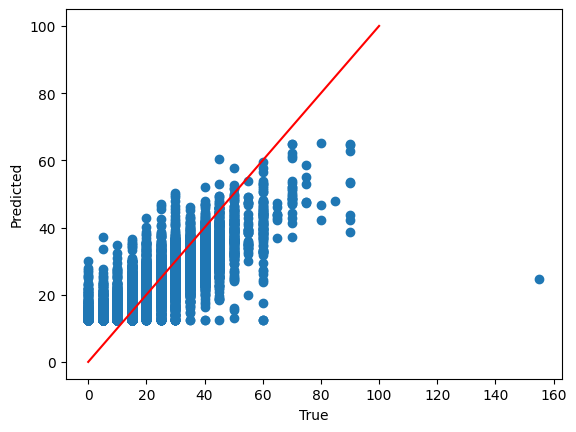

In [ ]:
# plot the predictions
model.eval()
y_pred = model(X_test_tensor).detach().numpy()
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 100], [0, 100], 'r')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()


## Une autre approche pour le réseau de neurones : Un par attraction, sans one hot encoding pour le jour de la semaine

Epoch 1/3000, Train Loss: 25.7133
Epoch 11/3000, Train Loss: 25.4962
Epoch 21/3000, Train Loss: 25.3204
Epoch 31/3000, Train Loss: 25.1632
Epoch 41/3000, Train Loss: 24.9994
Epoch 51/3000, Train Loss: 24.8638
Epoch 61/3000, Train Loss: 24.7157
Epoch 71/3000, Train Loss: 24.6298
Epoch 81/3000, Train Loss: 24.5383
Epoch 91/3000, Train Loss: 24.4006
Epoch 101/3000, Train Loss: 24.3222
Epoch 111/3000, Train Loss: 24.2271
Epoch 121/3000, Train Loss: 24.1540
Epoch 131/3000, Train Loss: 24.0885
Epoch 141/3000, Train Loss: 24.0064
Epoch 151/3000, Train Loss: 23.9269
Epoch 161/3000, Train Loss: 23.8724
Epoch 171/3000, Train Loss: 23.7715
Epoch 181/3000, Train Loss: 23.7211
Epoch 191/3000, Train Loss: 23.6563
Epoch 201/3000, Train Loss: 23.5515
Epoch 211/3000, Train Loss: 23.5173
Epoch 221/3000, Train Loss: 23.4384
Epoch 231/3000, Train Loss: 23.3533
Epoch 241/3000, Train Loss: 23.2523
Epoch 251/3000, Train Loss: 23.2058
Epoch 261/3000, Train Loss: 23.1609
Epoch 271/3000, Train Loss: 23.0571
Epo

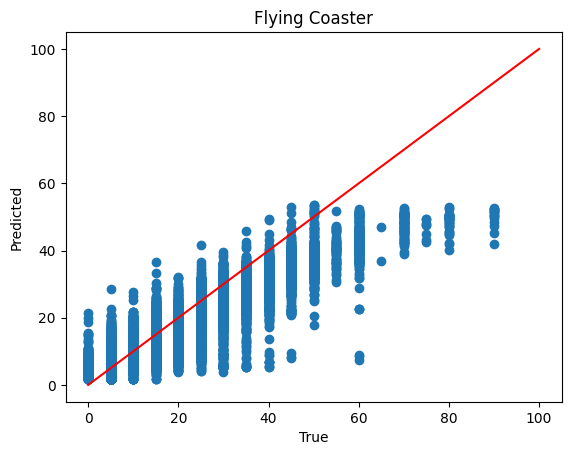

Epoch 1/3000, Train Loss: 31.9522
Epoch 11/3000, Train Loss: 31.7991
Epoch 21/3000, Train Loss: 31.6745
Epoch 31/3000, Train Loss: 31.5366
Epoch 41/3000, Train Loss: 31.4409
Epoch 51/3000, Train Loss: 31.3366
Epoch 61/3000, Train Loss: 31.2621
Epoch 71/3000, Train Loss: 31.1885
Epoch 81/3000, Train Loss: 31.0945
Epoch 91/3000, Train Loss: 31.0256
Epoch 101/3000, Train Loss: 30.9672
Epoch 111/3000, Train Loss: 30.8755
Epoch 121/3000, Train Loss: 30.8115
Epoch 131/3000, Train Loss: 30.7140
Epoch 141/3000, Train Loss: 30.6337
Epoch 151/3000, Train Loss: 30.5682
Epoch 161/3000, Train Loss: 30.5019
Epoch 171/3000, Train Loss: 30.4090
Epoch 181/3000, Train Loss: 30.3131
Epoch 191/3000, Train Loss: 30.2405
Epoch 201/3000, Train Loss: 30.1345
Epoch 211/3000, Train Loss: 30.0906
Epoch 221/3000, Train Loss: 30.0040
Epoch 231/3000, Train Loss: 29.9097
Epoch 241/3000, Train Loss: 29.8168
Epoch 251/3000, Train Loss: 29.7634
Epoch 261/3000, Train Loss: 29.6754
Epoch 271/3000, Train Loss: 29.5525
Epo

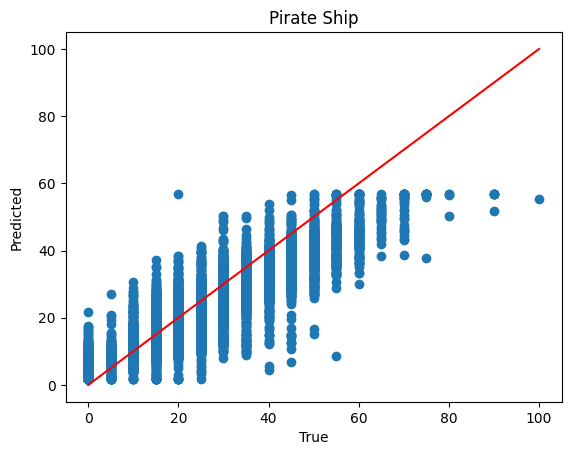

Epoch 1/3000, Train Loss: 26.4905
Epoch 11/3000, Train Loss: 26.3667
Epoch 21/3000, Train Loss: 26.2319
Epoch 31/3000, Train Loss: 26.1206
Epoch 41/3000, Train Loss: 26.0065
Epoch 51/3000, Train Loss: 25.9007
Epoch 61/3000, Train Loss: 25.7940
Epoch 71/3000, Train Loss: 25.6990
Epoch 81/3000, Train Loss: 25.5887
Epoch 91/3000, Train Loss: 25.4984
Epoch 101/3000, Train Loss: 25.3829
Epoch 111/3000, Train Loss: 25.2884
Epoch 121/3000, Train Loss: 25.2004
Epoch 131/3000, Train Loss: 25.0929
Epoch 141/3000, Train Loss: 25.0052
Epoch 151/3000, Train Loss: 24.8951
Epoch 161/3000, Train Loss: 24.7889
Epoch 171/3000, Train Loss: 24.6854
Epoch 181/3000, Train Loss: 24.6124
Epoch 191/3000, Train Loss: 24.5158
Epoch 201/3000, Train Loss: 24.4172
Epoch 211/3000, Train Loss: 24.3429
Epoch 221/3000, Train Loss: 24.2161
Epoch 231/3000, Train Loss: 24.1353
Epoch 241/3000, Train Loss: 24.0385
Epoch 251/3000, Train Loss: 23.9566
Epoch 261/3000, Train Loss: 23.8565
Epoch 271/3000, Train Loss: 23.7654
Epo

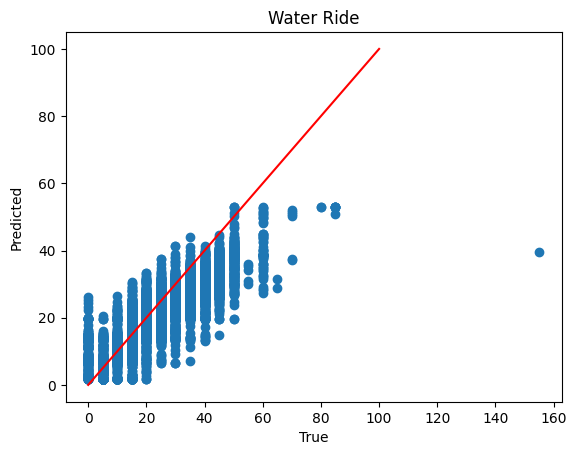

In [ ]:

# Fonction de preprocessing sans les one-hot encoding
def preprocess_no_ohe(X_data):
    X_data = X_data.merge(weather_data, on='DATETIME', how='left')
    dates = X_data['DATETIME']
    X_data['time_since_oppening'] = dates.dt.hour * 60 + dates.dt.minute - dates.dt.hour.min() * 60
    X_data['day_of_week'] = dates.dt.dayofweek
    X_data['month'] = dates.dt.month
    X_data['year'] = dates.dt.year
    X_data['is_holiday'] = dates.apply(is_holiday).astype(float)
    X_data['is_school_holiday'] = dates.apply(is_any_school_holiday).astype(float)


    # normalize columns
    for col in X_data.columns:
        # if col not in ['TIME_TO_NIGHT_SHOW', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2']:
        if col != 'DATETIME' and col != 'WAIT_TIME_IN_2H'  and X_data[col].dtype in [np.float64, np.int64] and not col.startswith('day_of_week_') and not col.startswith('attraction_') and not col.startswith('is_'):
            X_data[col] = (X_data[col] - X_data[col].mean()) / X_data[col].std()

    # fill the missing values with a big value
    X_data['TIME_TO_NIGHT_SHOW'].fillna(5, inplace=True)
    X_data['TIME_TO_PARADE_1'].fillna(5, inplace=True)
    X_data['TIME_TO_PARADE_2'].fillna(5, inplace=True)

    # do one hot encoding on the day of the week
    X_data['day_of_week'] = dates.dt.dayofweek
    X_data = make_one_hot(X_data, 'day_of_week', prefix="day_of_week")

    return X_data

X_data = preprocess_no_ohe(wtg_times)
X_data.head(5)

X_attributes = ['day_of_week_' + str(i) for i in range(7)] + ['time_since_oppening', 'TIME_TO_NIGHT_SHOW', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2', 'ADJUST_CAPACITY', 'DOWNTIME', 'CURRENT_WAIT_TIME', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all']
X_attributes += ['month', 'year', 'is_holiday', 'is_school_holiday']
#X_attributes += ['time_since_oppening', 'TIME_TO_NIGHT_SHOW', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2', 'ADJUST_CAPACITY', 'DOWNTIME', 'CURRENT_WAIT_TIME', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

def make_X_y_no_scale(X_data, X_attributes):
    X = X_data[X_attributes]

    y = X_data['WAIT_TIME_IN_2H']
    # keep X as a dataframe
    X = pd.DataFrame(X, columns=X_attributes)
    return X, y

# group by attraction
grouped_entity = X_data.groupby('ENTITY_DESCRIPTION_SHORT')

models = {}

for name, group in grouped_entity:
    X, y = make_X_y_no_scale(group, X_attributes)
    X = torch.tensor(X.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.float32)

    model = EnhancedNN(len(X_attributes))
    model.apply(init_weights)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    n_epochs = 3000
    train_losses = []
    test_losses = []

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item()**.5:.4f}')

    model.eval()
    y_pred = model(X).detach().numpy()
    plt.plot(y, y_pred, 'o')
    plt.plot([0, 100], [0, 100], 'r')
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title(name)
    plt.show()

    models[name] = model

In [ ]:
# to make the submission, we need to preprocess the validation data, then use the corresponding model to make the prediction for each attraction and concatenate the results
# we then need to group the results by attraction to do the submission
X_val = preprocess_no_ohe(validation)
X_val = X_val[X_attributes]

submission = pd.DataFrame(columns=['DATETIME', 'ENTITY_DESCRIPTION_SHORT', 'y_pred', 'KEY'])
for name, model in models.items():
    mask = validation['ENTITY_DESCRIPTION_SHORT'] == name
    X = torch.tensor(X_val[mask].values, dtype=torch.float32)
    y_pred = model(X).detach().numpy().flatten()
    submission = pd.concat([submission, pd.DataFrame({'DATETIME': validation['DATETIME'][mask], 'ENTITY_DESCRIPTION_SHORT': name, 'y_pred': y_pred, 'KEY': 'Validation'})])

submission.to_csv('submissions/MLP_2.csv', index=False)

## Essai rapide de différents modèles (random forests, lightgbm, xgboost, catboost)

In [ ]:
!pip install lightgbm
!pip install xgboost
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def preprocess(X_data):
    X_data = X_data.merge(weather_data, on='DATETIME', how='left')
    X_data = make_one_hot(X_data, 'ENTITY_DESCRIPTION_SHORT', prefix="attraction")
    dates = X_data['DATETIME']
    X_data['day_of_week'] = dates.dt.dayofweek
    X_data['month'] = dates.dt.month
    X_data['year'] = dates.dt.year
    X_data['is_holiday'] = dates.apply(is_holiday).astype(float)
    X_data['is_school_holiday'] = dates.apply(is_any_school_holiday).astype(float)
    X_data['is_special_day'] = dates.apply(special_days).astype(float)
    X_data = make_one_hot(X_data, 'day_of_week', prefix="day_of_week")
    X_data['time_since_oppening'] = dates.dt.hour * 60 + dates.dt.minute - dates.dt.hour.min() * 60

    # normalize the data colum by column, except for the one hot encoded columns
    for column in X_data.columns:
        if column.startswith('is_') or column.startswith('attraction_') or column.startswith('day_of_week_') or column == "WAIT_TIME_IN_2H" or X_data[column].dtype not in [np.float64, np.int64]:
            continue
        X_data[column] = (X_data[column] - mean[column]) / std[column]


    # fill the missing values with a big value
    X_data['TIME_TO_NIGHT_SHOW'].fillna(NIGHT_SHOW_FILL_VALUE, inplace=True)
    X_data['TIME_TO_PARADE_1'].fillna(PARADE_FILL_VALUE, inplace=True)
    X_data['TIME_TO_PARADE_2'].fillna(PARADE_FILL_VALUE, inplace=True)

    return X_data

X_val = preprocess(validation)
X_val = X_val[X_attributes]



# Préprocessing avec one-hot encoding
X_data = preprocess(wtg_times)

# Sélection des attributs
X_attributes = ['day_of_week_' + str(i) for i in range(7)] + ['attraction_Flying Coaster', 'attraction_Water Ride', 'attraction_Pirate Ship']
X_attributes += ['time_since_oppening', 'TIME_TO_NIGHT_SHOW', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2', 'ADJUST_CAPACITY', 'DOWNTIME', 'CURRENT_WAIT_TIME', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all']
X_attributes += ['month', 'year', 'is_holiday', 'is_school_holiday', 'is_special_day']

# Création des données
X, y = make_X_y(X_data, X_attributes)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Essai des random forests
print('Random Forests')

from sklearn.ensemble import RandomForestRegressor


# Création du modèle
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Prédiction et calcul de l'erreur
y_pred = model.predict(X_test)
print('MSE sur le jeu de test : ', mean_squared_error(y_test, y_pred))

y_val = model.predict(X_val)
make_submission(y_val, 'submissions/random_forests.csv')

# Essai avec un autre modèle (xgboost)

print('XGBoost')

import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE sur le jeu de test : ', mean_squared_error(y_test, y_pred))

y_val = model.predict(X_val)
make_submission(y_val, 'submissions/xgboost.csv')

# Essai avec un autre modèle (lightgbm)

print('LightGBM')

import lightgbm as lgb
model = lgb.LGBMRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE sur le jeu de test : ', mean_squared_error(y_test, y_pred))

y_val = model.predict(X_val)
make_submission(y_val, 'submissions/lightgbm.csv')

# Essai avec un autre modèle (catboost)

print('CatBoost')

from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE sur le jeu de test : ', mean_squared_error(y_test, y_pred))

y_val = model.predict(X_val)
make_submission(y_val, 'submissions/catboost.csv')

Random Forests
MSE sur le jeu de test :  100.58377310590296
XGBoost
MSE sur le jeu de test :  70.78228375072135
LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 29614, number of used features: 29
[LightGBM] [Info] Start training from score 23.550179
MSE sur le jeu de test :  63.29188438225953
CatBoost
0:	learn: 11.8554391	total: 146ms	remaining: 146ms
1:	learn: 11.3792180	total: 160ms	remaining: 0us
MSE sur le jeu de test :  135.1162666840433


### GridSearch pour le lightGBM

In [ ]:
# Now we do lightgbm grid search to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 30, 40],
    'max_depth': [5, 10, 15]
}

early_stopping_rounds = 10

model = lgb.LGBMRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mse')

print(grid_search.best_params_)
print(grid_search.best_estimator_)

y_pred = grid_search.best_estimator_.predict(X_test)
print('MSE sur le jeu de test : ', mean_squared_error(y_test, y_pred))

y_val = grid_search.best_estimator_.predict(X_val)
make_submission(y_val, 'submissions/lightgbm_grid_search.csv')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 29614, number of used features: 29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 23.550179
{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'num_leaves': 40}
LGBMRegressor(max_depth=15, n_estimators=200, num_leaves=40)
MSE sur le jeu de test :  53.623600007529326


### Par attraction

In [ ]:
# now we train a model for each attraction
X_data = preprocess(wtg_times)
grouped_entity = X_data.groupby('ENTITY_DESCRIPTION_SHORT')

models = {}

for name, group in grouped_entity:
    X, y = make_X_y(group, X_attributes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = lgb.LGBMRegressor()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(name, grid_search.best_params_)

    models[name] = grid_search.best_estimator_

submission = pd.DataFrame(columns=['DATETIME', 'ENTITY_DESCRIPTION_SHORT', 'y_pred', 'KEY'])
for name, model in models.items():
    mask = validation['ENTITY_DESCRIPTION_SHORT'] == name
    X = X_val[mask]
    y_pred = model.predict(X)
    submission = pd.concat([submission, pd.DataFrame({'DATETIME': validation['DATETIME'][mask], 'ENTITY_DESCRIPTION_SHORT': name, 'y_pred': y_pred, 'KEY': 'Validation'})])

submission.to_csv('submissions/lightgbm_grid_search_attraction.csv', index=False)


KeyError: 'ENTITY_DESCRIPTION_SHORT'

## Time Series

In [ ]:
# now we try time series models
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Préprocessing avec one-hot encoding
X_data = preprocess(wtg_times)
X_data = X_data.set_index(pd.DatetimeIndex(X_data['DATETIME']))

X_data = X_data.resample('H').mean().ffill()
X_data.sort_index(inplace=True)
X_data.index.freq = 'H'

# Sélection des attributs
X_attributes = ['day_of_week_' + str(i) for i in range(7)] + ['attraction_Flying Coaster', 'attraction_Water Ride', 'attraction_Pirate Ship']
X_attributes += ['time_since_oppening', 'TIME_TO_NIGHT_SHOW', 'TIME_TO_PARADE_1', 'TIME_TO_PARADE_2', 'ADJUST_CAPACITY', 'DOWNTIME', 'CURRENT_WAIT_TIME', 'temp', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'clouds_all']
X_attributes += ['month', 'year', 'is_holiday', 'is_school_holiday', 'is_special_day']

# Création des données
X, y = make_X_y(X_data, X_attributes)

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

print('Entrainement du modèle SARIMAX (!! long !!)')

# Création du modèle
model2 = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model2_res = model2.fit()


C:\Users\Mathis\AppData\Local\Temp\ipykernel_6860\820075317.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_data = X_data.resample('H').mean().ffill()
c:\Users\Mathis\.conda\envs\ProjetTunnel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mathis\.conda\envs\ProjetTunnel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Mathis\.conda\envs\ProjetTunnel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been p

Entrainement du modèle SARIMAX (!! long !!)


c:\Users\Mathis\.conda\envs\ProjetTunnel\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# cap the values of the predictions

preds = model2_res.predict(X_test)
preds = np.clip(preds, 0, 100)
preds

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# Prédiction et calcul de l'erreur
y_pred = model.predict(start=X_test.index[0], end=X_test.index[-1], exog=X_test)
print('MSE sur le jeu de test : ', mean_squared_error(y_test, y_pred))

# Soumission
X_val = preprocess(validation)
X_val = X_val[X_attributes]
y_val = model.predict(start=X_val.index[0], end=X_val.index[-1], exog=X_val)
make_submission(y_val, 'submissions/sarimax.csv')